In [1]:
import numpy as np
import pandas as pd

In [2]:
df_ds = pd.read_csv('./data/output_data_scientist.csv')
df_da = pd.read_csv('./data/output-data-analyst.csv')
df_de = pd.read_csv('./data/output-data-engineer.csv')
df_bi = pd.read_csv('./data/output-bi.csv')

df_ds.head()

,job_title,company_name,summary
0,Data Scientist,Apple,"Imagine what you could do here. At Apple, grea..."
1,Junior Data Scientist,The World Bank,WORLD BANK GROUP CONTEXT\n\nDevelopment data ...
2,Data Scientist,Crossover,Are you eager to join a network of the most ta...
3,Junior Data Scientist- Statistician,McAfee,Job Description\n\nThe Test & Learn Marketing ...
4,Data Scientist,Wiser,About us :\nWiser is the leading provider of a...


In [3]:
skills_list = ['python', 'sql', 'hadoop', 'spark', 'aws', 'r', 'big data', 'machine learning', 'deep learning',
               'sklearn', 'scikit-learn', 'HTML5' , 'javascript', 'jquery', 'excel', 'powerpoint', 'scala', 'java',
              'c++', 'hive', 'NLP', 'CART', 'SVM', 'regression', 'statistics', 'mapreduce', 'tableau', 'PyTorch' , 'TensorFlow', 
               'Theano', 'Keras', 'algorithms', 'Linear Models', 'Neural Networks', 'Decision Trees', 'Bayesian', 'Clustering',
               'Anomaly Detection', 'data mining']

In [4]:
from collections import Counter
import re
import matplotlib.pylab as plt
%matplotlib inline

class SkillsExtractor():
    
    def __init__(self, job_summaries_df, skills_list, nb_top_skills, job_title):
        self.job_summaries_df = job_summaries_df
        self.skills_list = skills_list
        self.nb_top_skills = nb_top_skills
        self.job_title = job_title
        
    def get_occurences(self, textfile):

        skills_dict  = {x : 0 for x in self.skills_list}

        cnt = Counter()
        words = re.findall('[A-Za-z+]+', textfile.lower())
        skills_dict = {skill.title() : 100 if Counter(words)[skill] > 0 else 0 for skill, ind in skills_dict.items()}
        
        # Deal with double word skill
    
        for skill in list(skills_dict.keys()):
            if ' ' in skill:                
                double_word_skill = re.findall(skill.lower(), textfile.lower())
                skills_dict[skill.title()] = 100 if len(double_word_skill) > 0 else 0 
        return skills_dict

    def get_skills_df(self, column_name):

        skills_df = pd.DataFrame(columns=[x.title() for x in self.skills_list])

        for ind, job_desc in enumerate(self.job_summaries_df[column_name]):
            if ind % 200 == 0:
                print("Job description n°%i" % ind)

            skills_occurences = self.get_occurences(job_desc)
            skills_df = skills_df.append(skills_occurences, ignore_index = True)

        return skills_df

    def extract_skills(self, column_name):

        new_df = self.job_summaries_df.copy()
        skills_df = self.get_skills_df(column_name)
        new_df = new_df.merge(skills_df, right_index=True, left_index=True)

        return new_df

    def get_top_n_skills_with_features(self, js_with_skills_df):
        
        skills_dict = js_with_skills_df[js_with_skills_df.columns[3:]].sum().apply(
            lambda x : x / len(js_with_skills_df)
        ).to_dict()
        
        top = self.nb_top_skills

        if top > len(skills_dict):
            top = len(skills_dict)
        
        top_n_skills = dict(Counter(skills_dict).most_common(top))
        
        return top_n_skills
    
    def get_top_skills(self, ):
        new_df_ds = self.extract_skills('summary')
        top_n_dict = self.get_top_n_skills_with_features(new_df_ds)

        print("The top %i skills are :" % self.nb_top_skills)
        for i in range(self.nb_top_skills):
            print("%i : %s (%.2f%%)" % 
                  (i+1, list(top_n_dict.keys())[i], list(top_n_dict.values())[i]))
        
        self.plot_top_skills(top_n_dict)
        return top_n_dict
    
    def plot_top_skills(self, top_dict):
        plt.figure(figsize = (15,8))
        plt.bar(range(len(top_dict)), list(top_dict.values()), align='center');
        plt.xticks(range(len(top_dict)), list(top_dict.keys()));
        plt.xlabel("Skills")
        plt.ylabel("% occurence among all job summaries")
        plt.title('Most important skills as a ' + self.job_title)
        

Job description n°0
Job description n°200
Job description n°400
Job description n°600
Job description n°800
The top 10 skills are :
1 : Python (66.79%)
2 : Machine Learning (62.01%)
3 : R (61.64%)
4 : Statistics (61.40%)
5 : Sql (47.43%)
6 : Algorithms (42.16%)
7 : Big Data (29.53%)
8 : Hadoop (27.08%)
9 : Java (25.49%)
10 : Spark (23.41%)


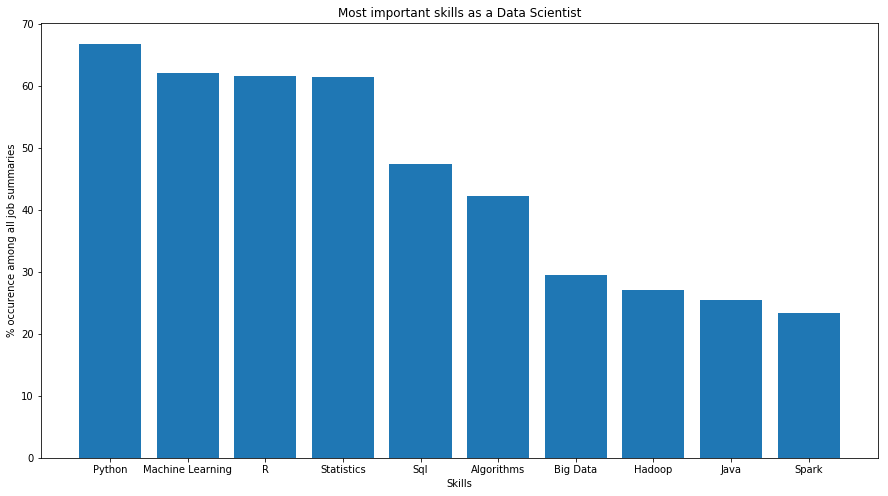

In [284]:
sk_ds = SkillsExtractor(df_ds, skills_list, 10, 'Data Scientist')
do_ds = sk_ds.get_top_skills()

Job description n°0
Job description n°200
Job description n°400
Job description n°600
The top 10 skills are :
1 : Sql (57.03%)
2 : Excel (44.37%)
3 : Statistics (37.85%)
4 : R (28.52%)
5 : Python (27.75%)
6 : Tableau (22.12%)
7 : Machine Learning (15.86%)
8 : Big Data (13.17%)
9 : Powerpoint (12.92%)
10 : Algorithms (10.36%)


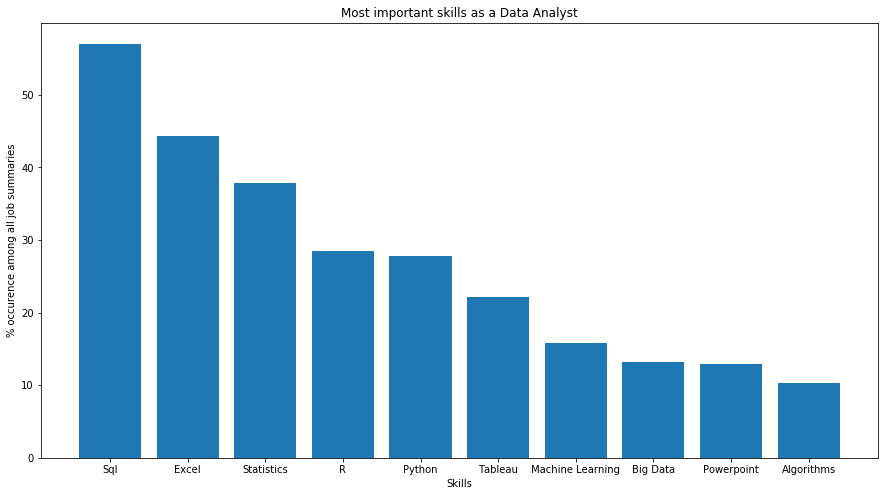

In [285]:
sk_da = SkillsExtractor(df_da, skills_list, 10, 'Data Analyst')
do_da = sk_da.get_top_skills()

Job description n°0
Job description n°200
Job description n°400
Job description n°600
Job description n°800
The top 10 skills are :
1 : Python (58.68%)
2 : Sql (52.68%)
3 : Java (45.44%)
4 : Big Data (40.57%)
5 : Hadoop (38.83%)
6 : Spark (37.45%)
7 : Machine Learning (27.59%)
8 : Aws (26.72%)
9 : Scala (20.85%)
10 : Hive (20.22%)


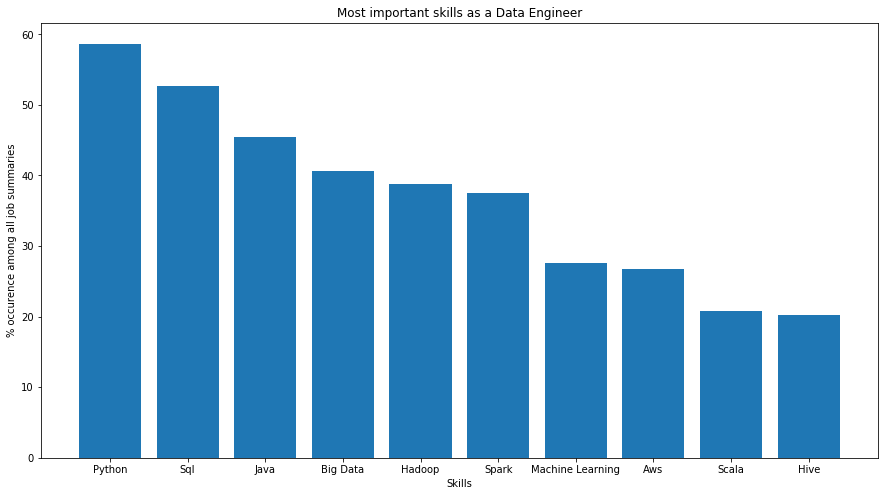

In [286]:
sk_de = SkillsExtractor(df_de, skills_list, 10, 'Data Engineer')
do_de = sk_de.get_top_skills()

Job description n°0
Job description n°200
Job description n°400
Job description n°600
The top 10 skills are :
1 : Sql (71.07%)
2 : Tableau (38.32%)
3 : Excel (34.52%)
4 : Statistics (21.19%)
5 : Python (20.81%)
6 : R (18.78%)
7 : Big Data (15.99%)
8 : Hadoop (11.93%)
9 : Powerpoint (9.52%)
10 : Java (8.25%)


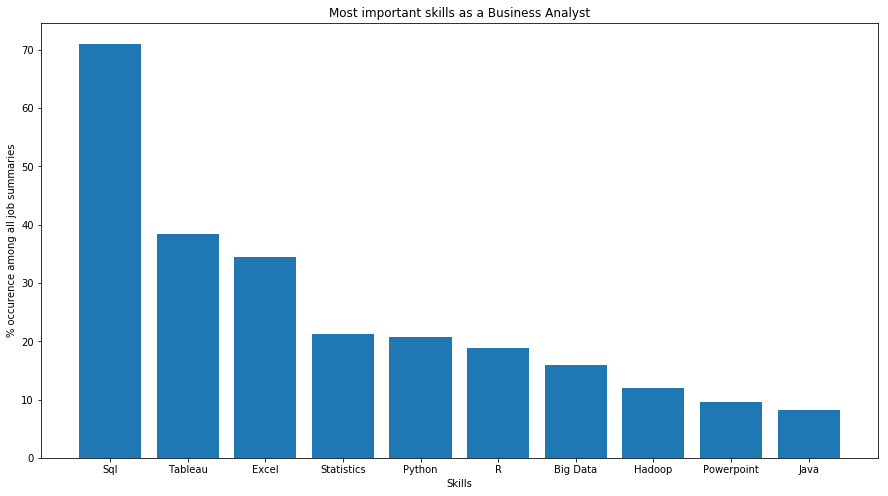

In [287]:
sk_bi = SkillsExtractor(df_bi, skills_list, 10, 'Business Analyst')
do_bi = sk_bi.get_top_skills()

In [102]:
def get_skills_part(textfile):
    keywords = ['qualifications', 'skills', 'requirements', 'required', 'experience']
    signs = [':', '\n']
    
    skill_part_found = False
    
    for keyword in keywords:
        skills_part = textfile
        still_keyword = True
        
        while still_keyword:

            try:
                keyword_index = skills_part.lower().index(keyword)

                skills_part = skills_part[keyword_index:]
                test_sign = False
                for sign in signs:
                    try:
                        sign_index = skills_part.lower().index(sign)
                        if sign_index - len(keyword) < 15:
                            test_sign = True
                            break
                    except:
                        pass
                if test_sign == True:
                    if len(skills_part[len(keyword):]) > 100:
                        skill_part_found = True
                        break
                    else:
                        test_sign = False

                skills_part = skills_part[len(keyword):]
            except:
                still_keyword = False
        if skill_part_found:
            break
                
    if skill_part_found != True:
        print("No qualifications part found... \n")
        skills_part = textfile
        
    print(skills_part)

In [125]:
get_skills_part(df_ds.summary[0])

Qualifications
Satisfy one of: (a) PhD in Machine Learning, Statistics, Optimization or related field, with experience building production systems, or (b) MS in CS with 4+ years of experience in working with large data-driven projects, or (c) BS in CS with 6+ years of experience in the industry with at least 3 years in data science / machine learning.
Proven track record delivering production software.
Deep fluency in Java, C++, or another production language.
Experience with Spark, Hadoop, MPI, or other distributed frameworks
Solid mathematical knowledge; understanding of machine learning, statistics.
Strong data-driven thinking.
Description
Develop and implement new machine learning algorithms and data science systems.

Produce high quality code with excellent reliability and scalability.

Explore novel architectural solutions and communicate ideas clearly.

Collaborate in cross-functional teams to prototype new concepts and deliver end-to-end systems.

Technical leadership experienc